# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
190736               2020-07-18           2020-07-11            2020-06-30   
190737               2020-07-18           2020-07-11            2020-06-30   
190738               2020-07-18           2020-07-11            2020-06-30   
190739               2020-07-18           2020-07-15            2020-07-04   
190740               2020-07-18           2020-07-12            2020-07-01   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
190736             2020-06-26 00:00:00                   NaT   
190737             2020-06-26 00:00:00                   NaT   
190738             2020-06-26 00:00:00                   NaT   
190739             2020-06-30 00:00:00                   NaT   
190740             2020-06-27 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
190736                    NaT                 Cali  Valle del Cauca      Leve   
190737                    NaT                 Cali  Valle del Cauca      Leve   
190738                    NaT                 Cali  Valle del Cauca      Leve   
190739                    NaT                 Cali  Valle del Cauca      Leve   
190740                    NaT                 Cali  Valle del Cauca      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
190736            Casa  ...               40 - 50    M               NaN   
190737            Casa  ...               60 - 70    M               NaN   
190738            Casa  ...               30 - 40    M               NaN   
190739            Casa  ...               40 - 50    M               NaN   
190740            Casa  ...               20 - 30    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1030   1424
Antioquia                                            6200   8486
Arauca                                                 31    130
Archipiélago de San Andrés Providencia y Santa ...      9     21
Atlántico                                            8575   9882
Barranquilla D.E.                                   11310  13393
Bogotá D.C.                                         29967  30427
Bolívar                                               744    954
Boyacá                                                303    321
Buenaventura D.E.                                     686   1155
Caldas                                                201    159
Caquetá                                                99    121
Cartagena D.T. y C.                                  5813   7243
Casanare                                               54     94
Cauca                                                 454    601
Cesar                                                 885   1008
Chocó                                                1111   1360
Cundinamarca                                         2765   2884
Córdoba                                              1292   1292
Guainía                                                 6      8
Guaviare                                                7     41
Huila                                                 262    258
La Guajira                                            684    736
Magdalena                                             706    775
Meta                                                  438   1457
Nariño                                               2366   2828
Norte de Santander                                    342    448
Putumayo                                               88    111
Quindío                                               115     93
Risaralda                                             515    455
Santa Marta D.T. y C.                                1193   1273
Santander                                             717   1146
Sucre                                                1808   2125
Tolima                                                543   1214
Valle del Cauca                                      7053   8342
Vaupés                                                 27     34
Vichada                                                 1      1

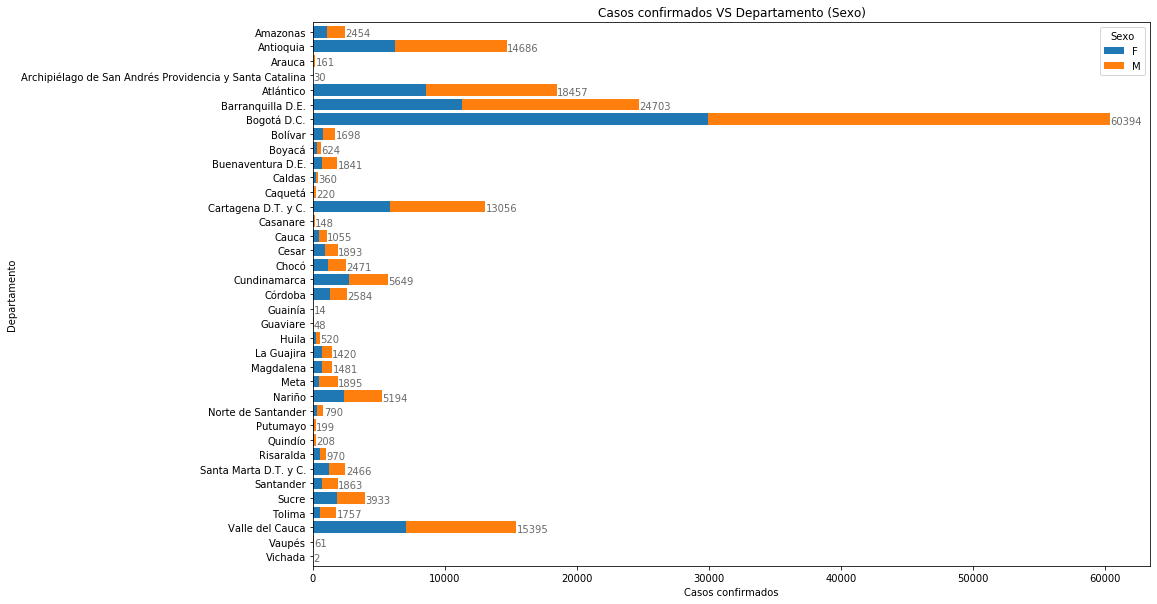

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               129      442      504   
Antioquia                                              535     1108     3987   
Arauca                                                   5       33       65   
Archipiélago de San Andrés Providencia y Santa ...       0        1        8   
Atlántico                                              786     1332     4104   
Barranquilla D.E.                                      907     1524     5461   
Bogotá D.C.                                           2847     4799    13848   
Bolívar                                                 80      159      376   
Boyacá                                                  36       57      125   
Buenaventura D.E.                                       35      247      429   
Caldas                                                  13       23       73   
Caquetá                                                  7       15       71   
Cartagena D.T. y C.                                    528      901     2991   
Casanare                                                 7        7       42   
Cauca                                                   53       98      235   
Cesar                                                  162      205      430   
Chocó                                                  102      211      582   
Cundinamarca                                           290      413     1293   
Córdoba                                                 93      132      524   
Guainía                                                  0        2        4   
Guaviare                                                 0       18       10   
Huila                                                   31       50      103   
La Guajira                                              75      149      328   
Magdalena                                               85      111      258   
Meta                                                    29      133      620   
Nariño                                                 261      482     1222   
Norte de Santander                                      36       30      198   
Putumayo                                                 4       16       47   
Quindío                                                  8       14       31   
Risaralda                                               65       94      209   
Santa Marta D.T. y C.                                  110      179      535   
Santander                                               64      170      480   
Sucre                                                  159      312      847   
Tolima                                                  63      108      585   
Valle del Cauca                                        548     1109     3534   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                474      330      266   
Antioquia                                              3730     2238     1668   
Arauca                                                   39       10        5   
Archipiélago de San Andrés Providencia y Santa ...       10        6        3   
Atlántico                                              4344     2917     2395   
Barranquilla D.E.                                      5885     3836     3316   
Bogotá D.C.                                           13065     9632     8129   
Bolívar                                                 411      247      153   
Boyacá                                                  116      101 

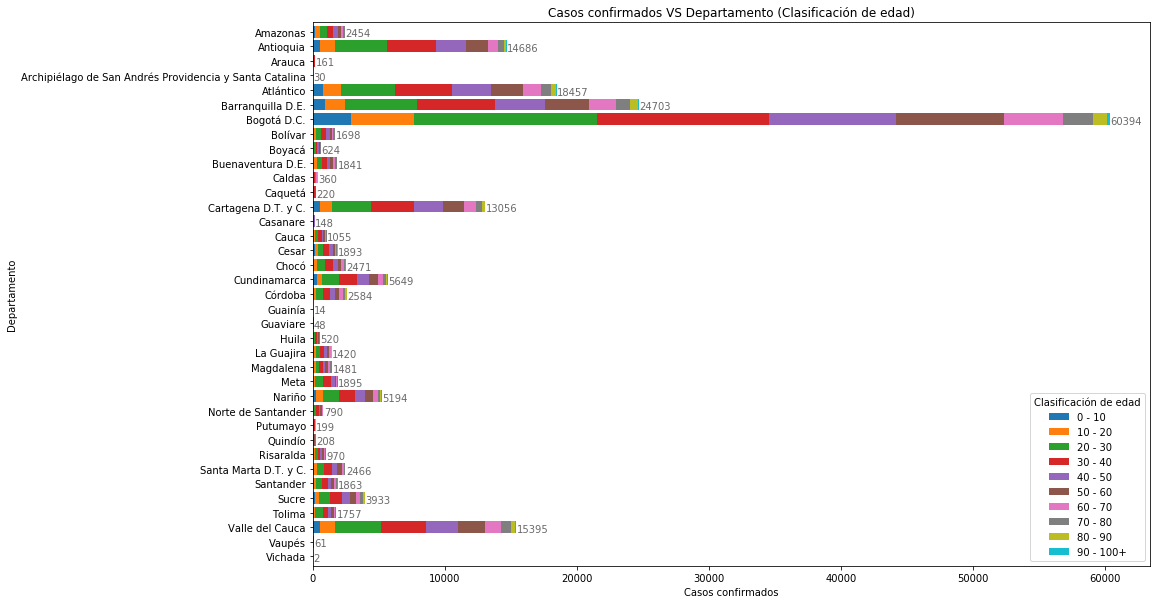

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               68.0      101.0   
Antioquia                                            9848.0      182.0   
Arauca                                                 74.0        0.0   
Archipiélago de San Andrés Providencia y Santa ...      6.0        0.0   
Atlántico                                            7111.0      872.0   
Barranquilla D.E.                                    9781.0     1264.0   
Bogotá D.C.                                         31999.0     1486.0   
Bolívar                                               673.0       82.0   
Boyacá                                                233.0       20.0   
Buenaventura D.E.                                     342.0      123.0   
Caldas                                                 88.0        7.0   
Caquetá                                               150.0        4.0   
Cartagena D.T. y C.                                  4211.0      417.0   
Casanare                                               73.0        1.0   
Cauca                                                 576.0       34.0   
Cesar                                                 641.0       38.0   
Chocó                                                 801.0       80.0   
Cundinamarca                                         2621.0      121.0   
Córdoba                                              1319.0      286.0   
Guainía                                                 0.0        1.0   
Guaviare                                                9.0        0.0   
Huila                                                 141.0       15.0   
La Guajira                                            876.0       74.0   
Magdalena                                             507.0      150.0   
Meta                                                  620.0       20.0   
Nariño                                               1613.0      163.0   
Norte de Santander                                    428.0       35.0   
Putumayo                                              120.0       11.0   
Quindío                                                42.0        5.0   
Risaralda                                             420.0       21.0   
Santa Marta D.T. y C.                                1388.0       88.0   
Santander                                            1038.0       39.0   
Sucre                                                2226.0      209.0   
Tolima                                                802.0       31.0   
Valle del Cauca                                      6242.0      535.0   
Vaupés                                                 34.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                11.0           7.0   
Antioquia                                              695.0          86.0   
Arauca                                                   5.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              647.0          98.0   
Barranquilla D.E.                                      921.0         117.0   
Bogotá D.C.                                           3322.0         174.0   
Bolívar                                                 92.0           8.0   
Boyacá                                                  46.0           3.0   
Buenaventura D.E.                                      114.0          19.0   
Caldas                                                  17.0           3.0   
Caquetá                                                 27.0           2.0   
Cartagena D.T. y C.  

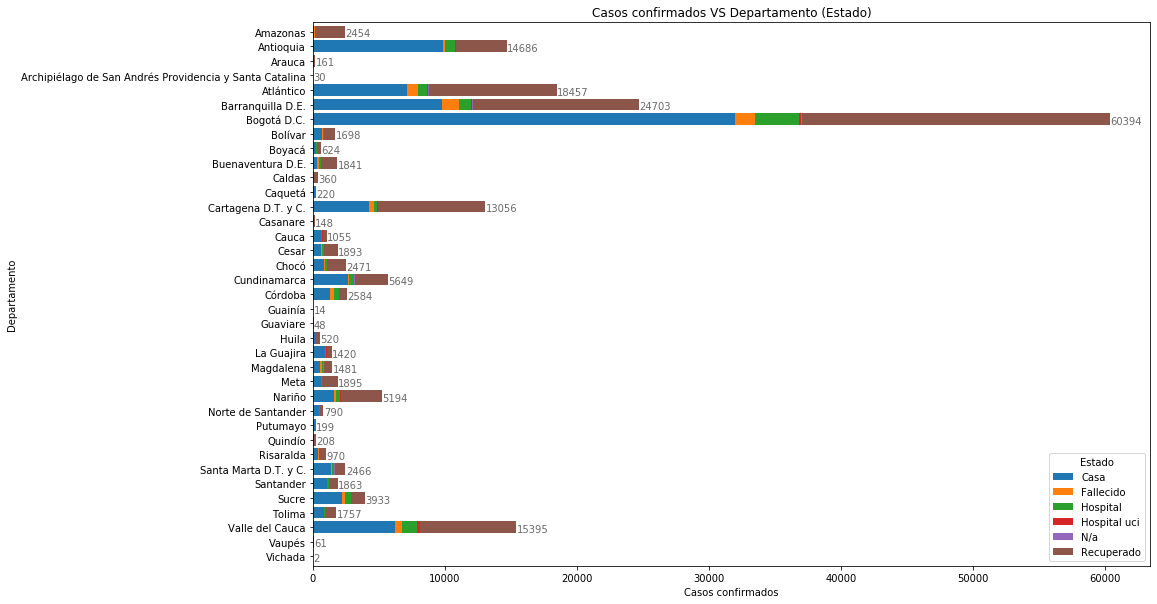

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          41285  45836
Fallecido      2440   4076
Hospital       4144   5630
Hospital uci    384    679
N/a             165    225
Recuperado    39982  45854

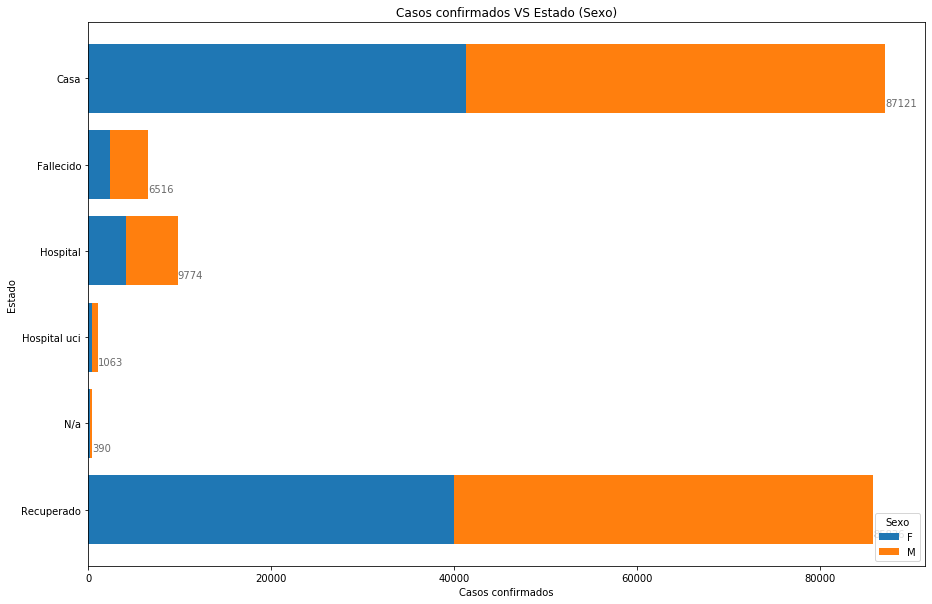

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3689     6781    21994    21538    13960    10626   
Fallecido                  13       14       93      236      527     1016   
Hospital                  371      223      813     1276     1517     2011   
Hospital uci               49       25       41      119      152      241   
N/a                        11        8       14       18       27       45   
Recuperado               4024     7639    21223    20487    13453    10289   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      5247     2228      897        161  
Fallecido                 1532     1601     1207        277  
Hospital                  1740     1174      570         79  
Hospital uci               236      148       46          6  
N/a                         84       88       74         21  
Recuperado                5256     2395      927        143

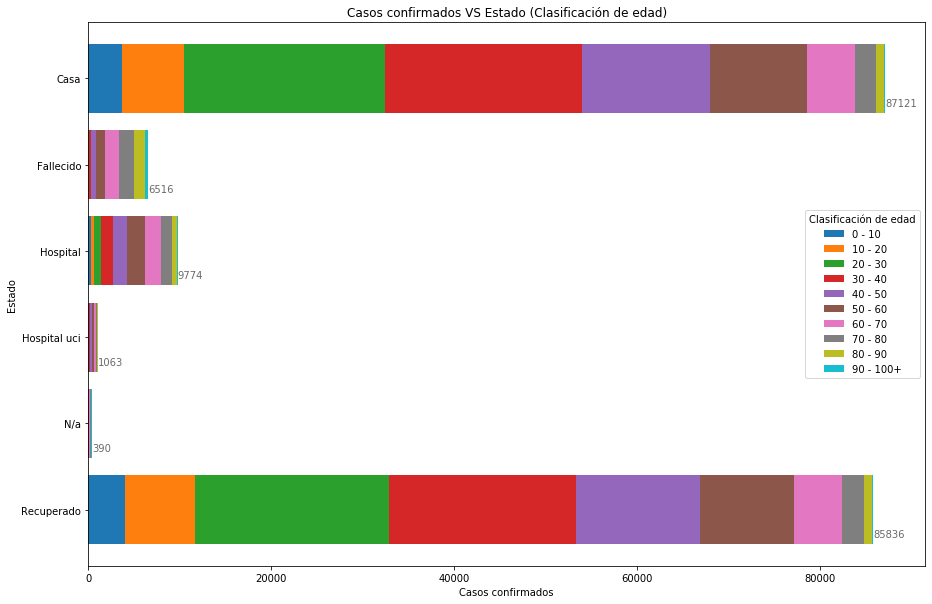

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F      M
Tipo                     
En estudio   82499  90091
Importado      451    516
Relacionado   5450  11693

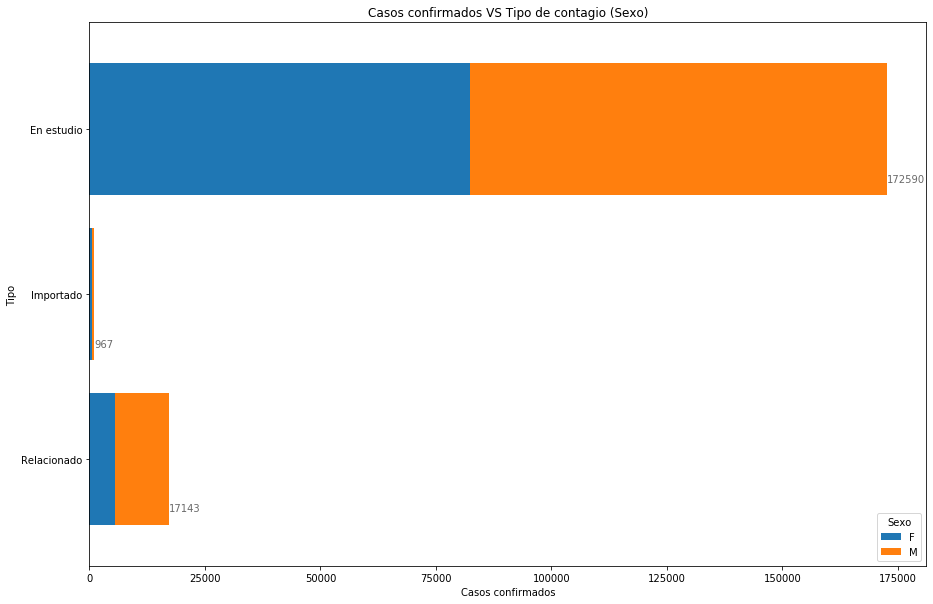

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               7331    12351    39088    39363    27306    22533   
Importado                   6       35      240      227      171      149   
Relacionado               820     2304     4850     4084     2159     1546   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               13227     7223     3524        644  
Importado                   94       35        9          1  
Relacionado                774      376      188         42

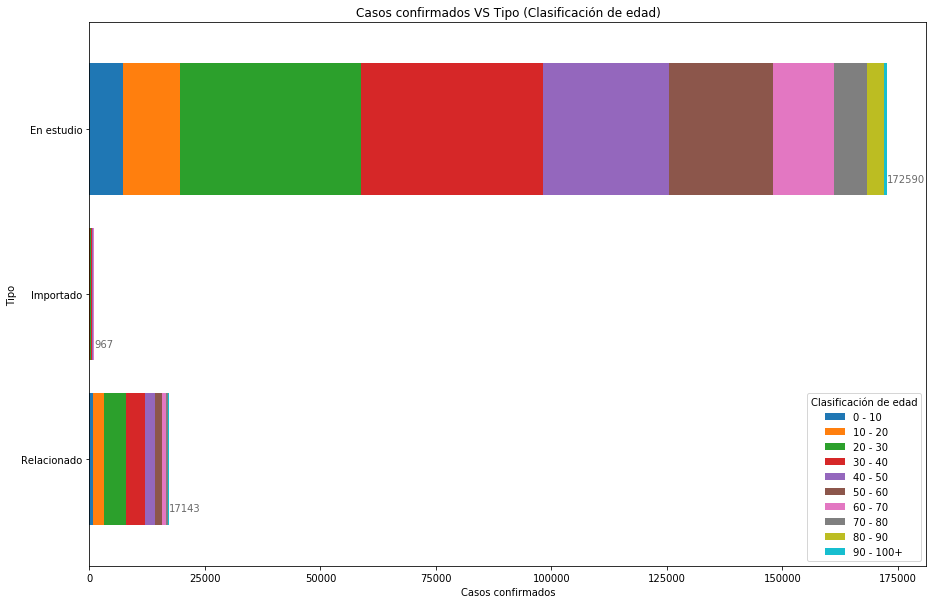

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  4084   4073
10 - 20                 6707   7983
20 - 30                20678  23500
30 - 40                19849  23825
40 - 50                13740  15896
50 - 60                11179  13049
60 - 70                 6485   7610
70 - 80                 3447   4187
80 - 90                 1837   1884
90 - 100+                394    293

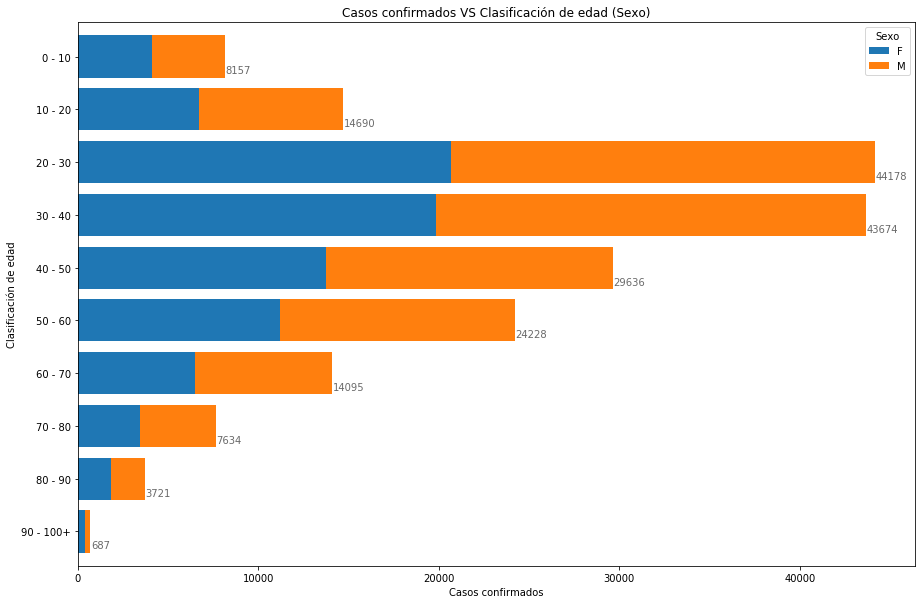

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3689         13       371            49   11   
10 - 20                 6781         14       223            25    8   
20 - 30                21994         93       813            41   14   
30 - 40                21538        236      1276           119   18   
40 - 50                13960        527      1517           152   27   
50 - 60                10626       1016      2011           241   45   
60 - 70                 5247       1532      1740           236   84   
70 - 80                 2228       1601      1174           148   88   
80 - 90                  897       1207       570            46   74   
90 - 100+                161        277        79             6   21   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       4024  
10 - 20                      7639  
20 - 30                     21223  
30 - 40                     20487  
40 - 50                     13453  
50 - 60                     10289  
60 - 70                      5256  
70 - 80                      2395  
80 - 90                       927  
90 - 100+                     143

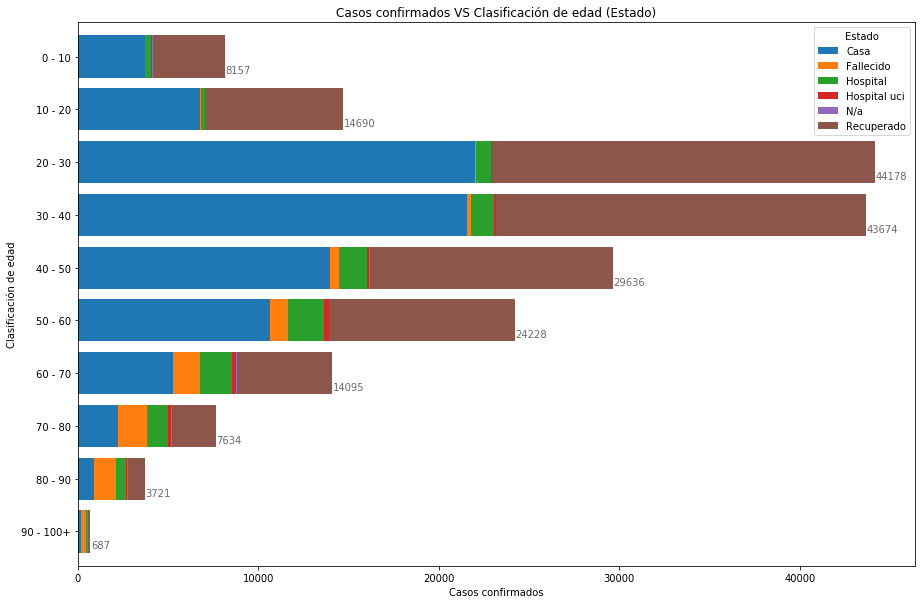

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-14            3436.0  4101.0
2020-07-15            3050.0  3463.0
2020-07-16            2846.0  2902.0
2020-07-17             789.0   871.0
2020-07-18             886.0   915.0

[132 rows x 2 columns]

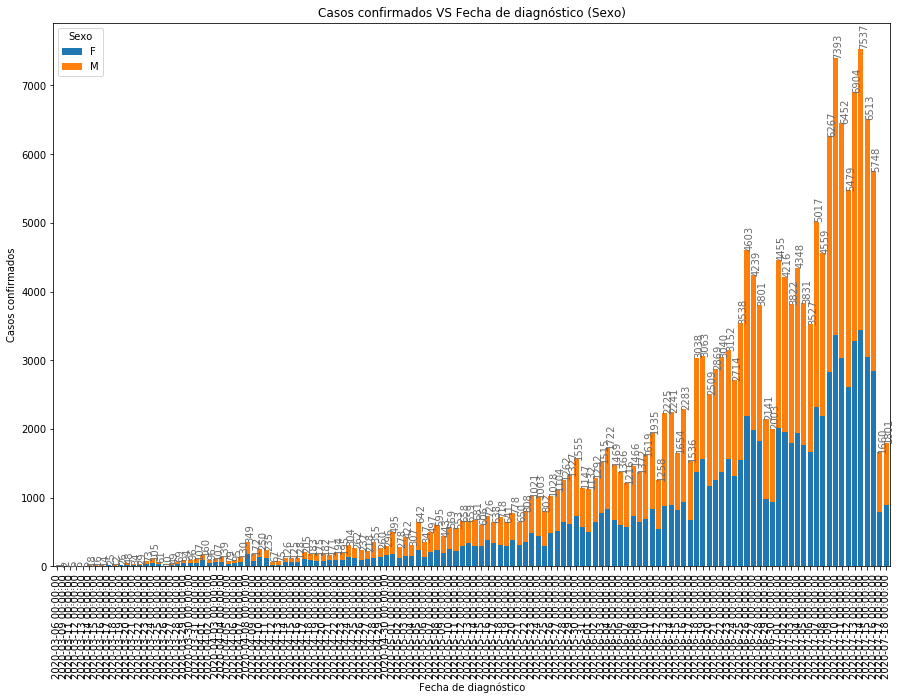

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-14                285      566     1775     1777     1227      937   
2020-07-15                274      499     1486     1475     1035      862   
2020-07-16                259      394     1303     1306      926      805   
2020-07-17                 51       85      375      393      257      205   
2020-07-18                 72       99      378      440      287      251   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-14                 501      275      168         26  
2020-07-15                 469      281      114         18  
2020-07-16                 426      216      102         11  
2020-07-17                 156       75       49         14  
2020-07-18                 136       86       45          7  

[132 rows x 10 columns]

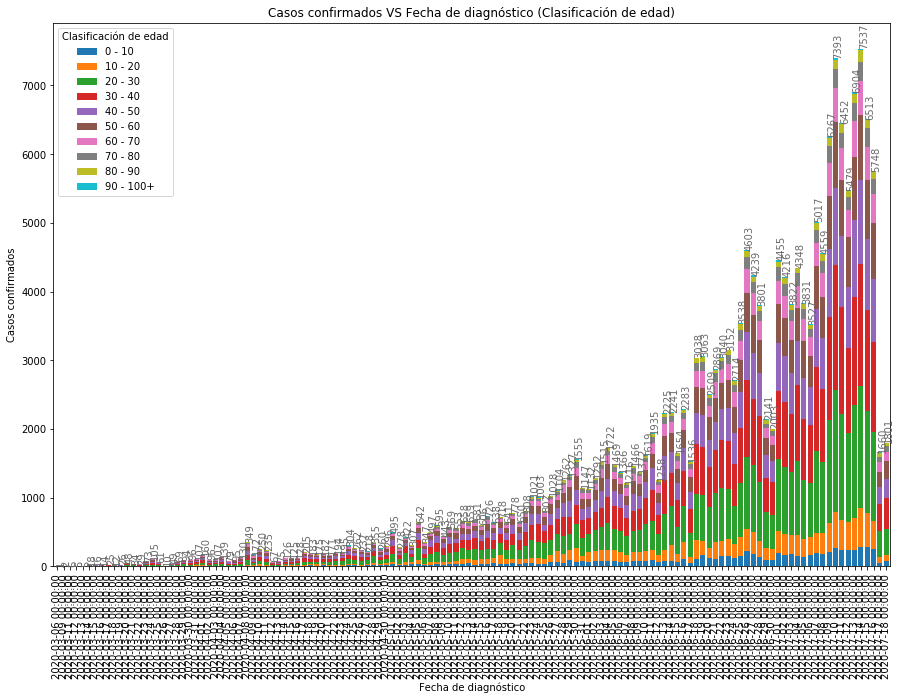

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-07-14            6823.0      137.0     438.0          44.0  6.0   
2020-07-15            5982.0      103.0     396.0          32.0  0.0   
2020-07-16            5204.0       96.0     416.0          27.0  4.0   
2020-07-17            1432.0        3.0     204.0          21.0  0.0   
2020-07-18            1662.0        0.0     137.0           2.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-14                  89.0  
2020-07-15                   0.0  
2020-07-16                   1.0  
2020-07-17                   0.0  
2020-07-18                   0.0  

[132 rows x 6 columns]

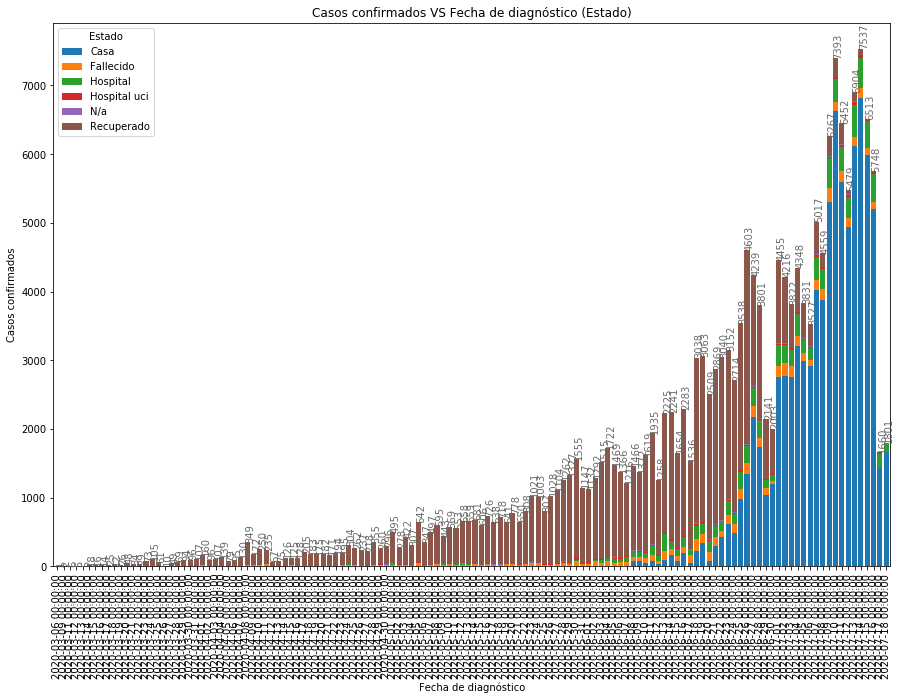

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F         M
Fecha de diagnóstico                   
2020-03-06                1.0       0.0
2020-03-09                2.0       1.0
2020-03-11                6.0       3.0
2020-03-12               11.0       3.0
2020-03-13               13.0       6.0
...                       ...       ...
2020-07-14            79078.0   92175.0
2020-07-15            82128.0   95638.0
2020-07-16            84974.0   98540.0
2020-07-17            85763.0   99411.0
2020-07-18            86649.0  100326.0

[132 rows x 2 columns]

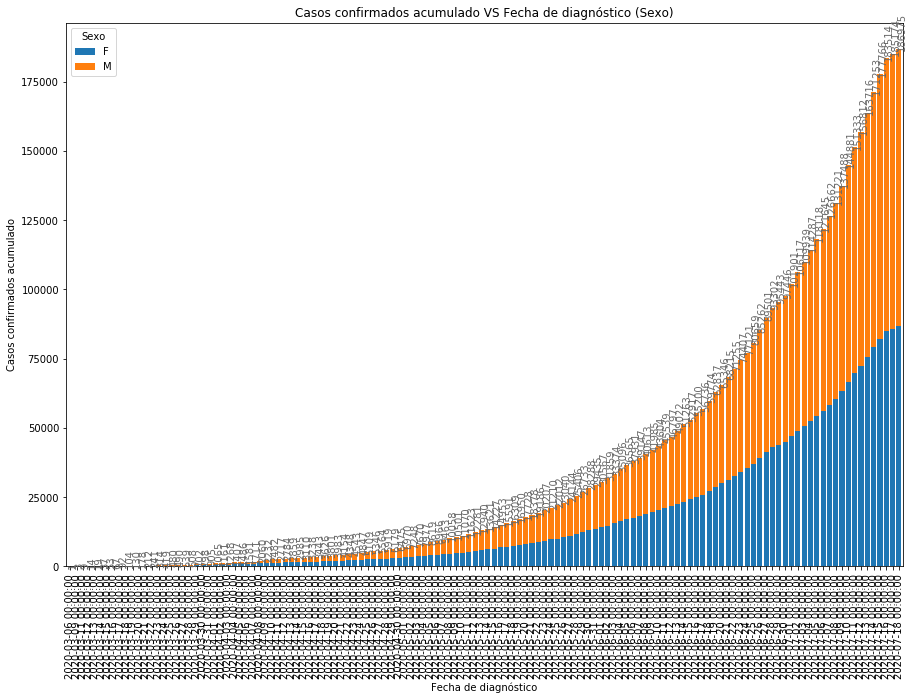

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-14               7372    13338    39752    39164    26581    21647   
2020-07-15               7646    13837    41238    40639    27616    22509   
2020-07-16               7905    14231    42541    41945    28542    23314   
2020-07-17               7956    14316    42916    42338    28799    23519   
2020-07-18               8028    14415    43294    42778    29086    23770   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-14               12627     6818     3327        627  
2020-07-15               13096     7099     3441        645  
2020-07-16               13522     7315     3543        656  
2020-07-17               13678     7390     3592        670  
2020-07-18               13814     7476     3637        677  

[132 rows x 10 columns]

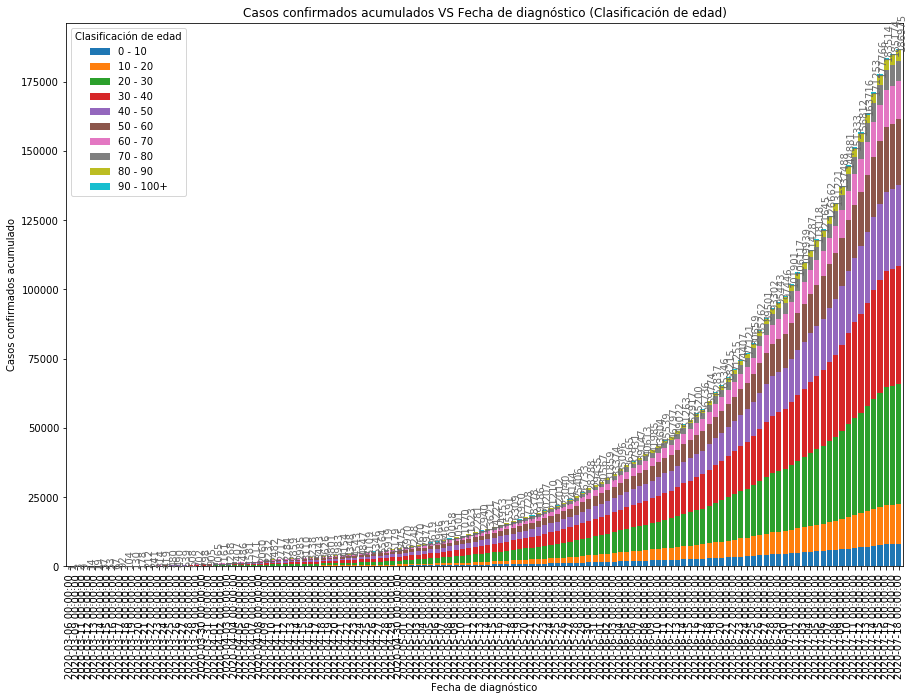

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-14            72569.0     6150.0    8466.0         947.0  368.0   
2020-07-15            78551.0     6253.0    8862.0         979.0  368.0   
2020-07-16            83755.0     6349.0    9278.0        1006.0  372.0   
2020-07-17            85187.0     6352.0    9482.0        1027.0  372.0   
2020-07-18            86849.0     6352.0    9619.0        1029.0  372.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-14               82753.0  
2020-07-15               82753.0  
2020-07-16               82754.0  
2020-07-17               82754.0  
2020-07-18               82754.0  

[132 rows x 6 columns]

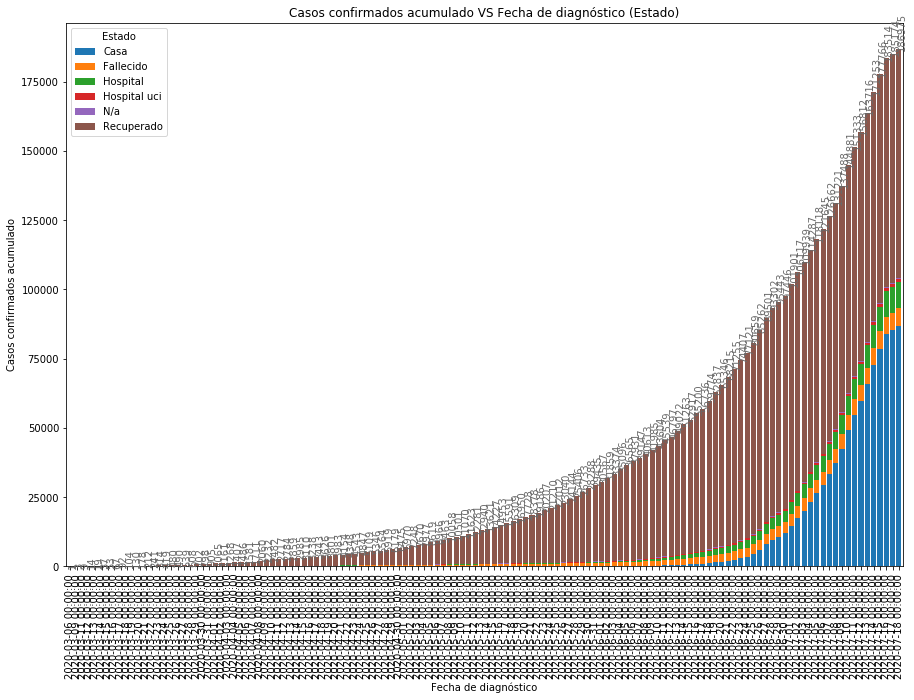

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>